<a href="https://colab.research.google.com/github/tohnperfect/multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## จุดมุ่งหมายของการทำ Cluster Analysis คือ การจัดกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## ตัด column สุดท้าย ที่เป็น class ของข้อมูลออก

In [3]:
example_df_drop = example_df.iloc[:,:-1]
example_df_drop

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Kmean

### Import

In [4]:
from sklearn.cluster import KMeans

### Define

In [10]:
kmeans = KMeans(random_state=2021)

### Fit - Transform

คำนวณหาจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering

In [11]:
kmeans.fit(example_df_drop)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [12]:
kmeans.cluster_centers_

array([[5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444]])

ทำสอบการจัดกลุ่มของ Data

In [13]:
y = kmeans.predict(example_df_drop)
y

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 4, 1, 4, 1, 6, 1, 4, 6, 4, 4, 1, 4, 1,
       4, 4, 1, 4, 7, 4, 7, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 7, 4, 1, 1, 1,
       4, 4, 4, 1, 4, 6, 4, 4, 4, 1, 6, 4, 5, 7, 2, 5, 5, 2, 4, 2, 5, 2,
       5, 7, 5, 7, 7, 5, 5, 2, 2, 7, 5, 7, 2, 7, 5, 2, 7, 7, 5, 2, 2, 2,
       5, 7, 7, 2, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 7], dtype=int32)

Quiz 6 ทำ PCA ข้อมูล ```example_df_drop``` แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(example_df_drop)

In [16]:
from matplotlib import pyplot as plt

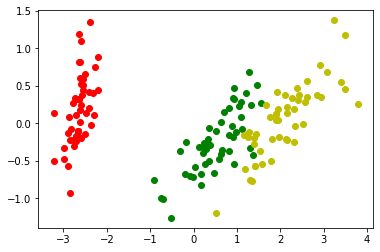

In [17]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

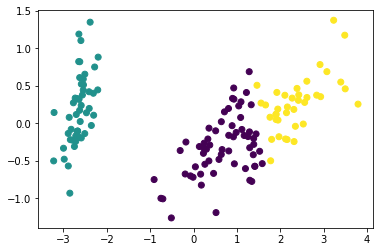

In [20]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

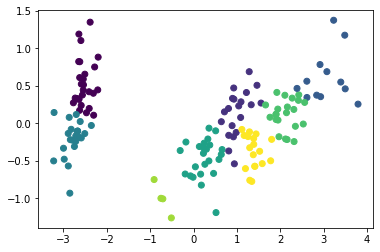

In [18]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)